### Clase 2: Introducción a seaborn

Objetivos:
- Aprender a usar seaborn para crear gráficos estadísticos
- Explorar relaciones entre variables categóricas y numéricas
- Aplicar comparaciones y visualizaciones grupales

#### **Parte 1.1: Gráficos básicos (Dataframe "Ventas"**)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import os
os.chdir('/content/drive/MyDrive/Docencia/Visualización de datos UCU/Python/Bases y Notebooks')

In [ ]:
df_total = pd.read_csv("Total_ventas.csv")
df_total.head()

,Tipo Bicicleta,Unidades Vendidas,Precio Venta,Año,Fecha,Sucursal,Monto Venta
0,Electrica,947,125,2017,1/09/2017,Sucursal_n1,118375
1,Electrica,344,350,2017,5/10/2017,Sucursal_n1,120400
2,Montaña,1715,20,2017,6/10/2017,Sucursal_n1,34300
3,Paseo,1715,20,2017,21/10/2017,Sucursal_n1,34300
4,Paseo,380,15,2017,18/12/2017,Sucursal_n1,5700


In [ ]:
#Primero tenemos que agrupar y luego graficar
ventas_agrupadas = df_total.groupby(['Año', 'Tipo Bicicleta'])['Unidades Vendidas'].sum().reset_index()
ventas_agrupadas

,Año,Tipo Bicicleta,Unidades Vendidas
0,2017,Electrica,112308
1,2017,Montaña,101631
2,2017,Paseo,272984
3,2018,Electrica,9959
4,2018,Montaña,13912
5,2018,Paseo,36763


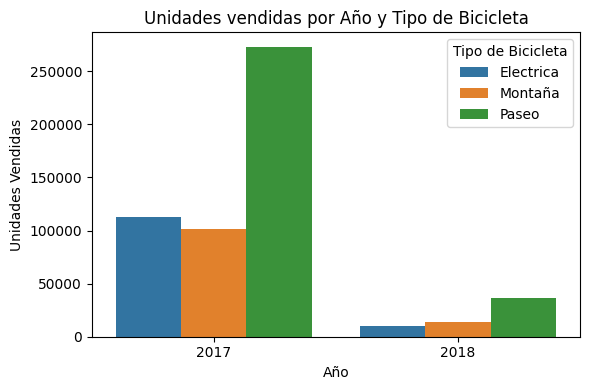

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(data=ventas_agrupadas, x='Año', y='Unidades Vendidas', hue='Tipo Bicicleta')
plt.title('Unidades vendidas por Año y Tipo de Bicicleta')
plt.ylabel('Unidades Vendidas')
plt.xlabel('Año')
plt.legend(title='Tipo de Bicicleta')
plt.tight_layout()
plt.show()
#seaborn utiliza matplotlib por detrás, pero te permite construir gráficos más estéticos y con menos código para estadísticas comunes.
#seaborn crea el gráfico, matplotlib lo termina de personalizar y lo muestra.

Cambiamos de color las categorías y nos quedamos solo con las ventas de Sucursal 1

In [ ]:
#Primero filtramos el df original
df_sucursal1 = df_total[df_total['Sucursal'] == 'Sucursal_n1']

In [ ]:
#Agrupamos solo esas ventas
ventas_agrupadas = df_sucursal1.groupby(['Año', 'Tipo Bicicleta'])['Unidades Vendidas'].sum().reset_index()

In [ ]:
#Cambiamos los colores
colores = {
    'Paseo': '#800080',     # Violeta
    'Montaña': '#FF0000',   # Rojo
    'Electrica': '#808080'  # Gris
}

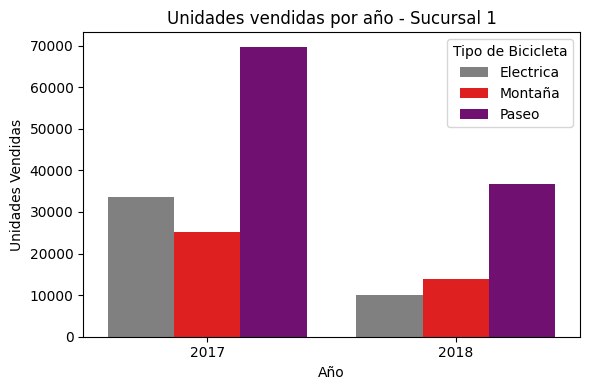

In [ ]:
plt.figure(figsize=(6,4))

sns.barplot(
    data=ventas_agrupadas,
    x='Año',
    y='Unidades Vendidas',
    hue='Tipo Bicicleta',
    palette=colores
)

plt.title('Unidades vendidas por año - Sucursal 1')
plt.ylabel('Unidades Vendidas')
plt.xlabel('Año')
plt.legend(title='Tipo de Bicicleta')
plt.tight_layout()
plt.show()

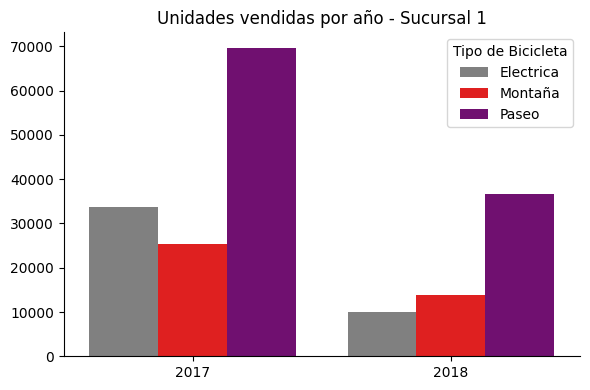

In [ ]:
#Esto elimina los bordes superior y derecho del gráfico:

plt.figure(figsize=(6,4))

sns.barplot(
    data=ventas_agrupadas,
    x='Año',
    y='Unidades Vendidas',
    hue='Tipo Bicicleta',
    palette={
        'Paseo': '#800080',      # Violeta
        'Montaña': '#FF0000',    # Rojo
        'Electrica': '#808080'   # Gris
    }
)

# Título
plt.title('Unidades vendidas por año - Sucursal 1')

# Quitar etiquetas de ejes
plt.xlabel("")
plt.ylabel("")

# Eliminar bordes superior y derecho
sns.despine(top=True, right=True)

# Ajuste final
plt.legend(title='Tipo de Bicicleta')
plt.tight_layout() #Este comando ajusta automáticamente el diseño del gráfico para que los elementos no se superpongan ni queden recortados.
plt.show()

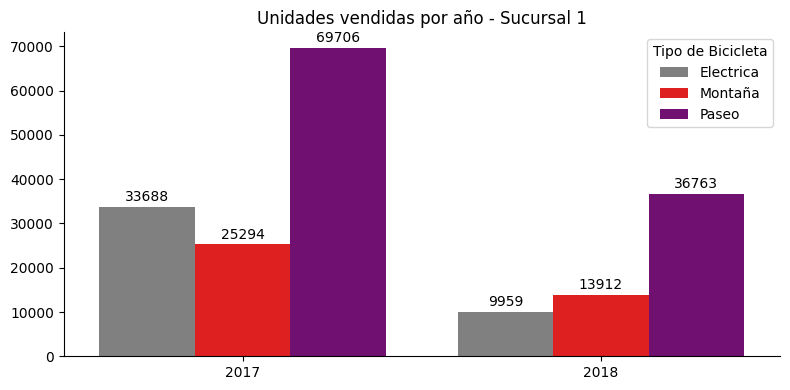

In [ ]:
#ahora vamos a agregar los valores en cada barra

plt.figure(figsize=(8,4))

# Crear gráfico
ax = sns.barplot(
    data=ventas_agrupadas,
    x='Año',
    y='Unidades Vendidas',
    hue='Tipo Bicicleta',
    palette={
        'Paseo': '#800080',
        'Montaña': '#FF0000',
        'Electrica': '#808080'
    }
)

# Agregar etiquetas sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=2)


plt.title('Unidades vendidas por año - Sucursal 1')
plt.xlabel("")
plt.ylabel("")
sns.despine(top=True, right=True)
plt.legend(title='Tipo de Bicicleta')
plt.tight_layout()
plt.show()

¿Qué hace ax.bar_label()?
- container: cada grupo de barras (hue)
- fmt='%.0f': formato sin decimales
- label_type='edge': coloca el valor en el borde superior de la barra
- padding=2: un poco de espacio arriba del valor

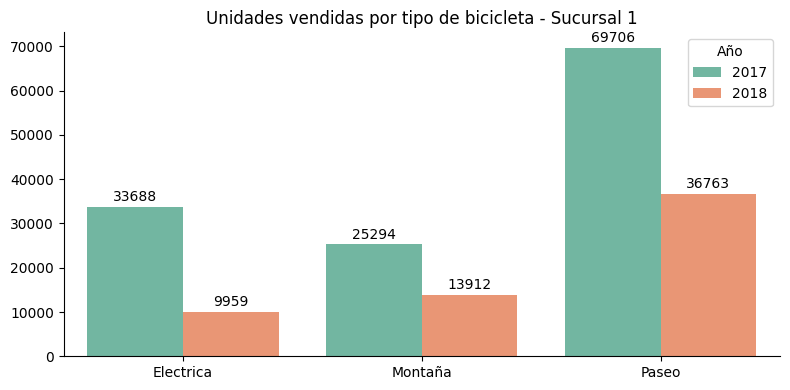

In [ ]:
#Cambiamos de orden para que para que el eje X muestre primero la categoría (Tipo Bicicleta) y
#dentro de cada una se agrupen los valores por año (Año), podés hacerlo ajustando tanto el x como el hue en el sns.barplot().

plt.figure(figsize=(8,4))

# Crear gráfico
ax = sns.barplot(
    data=ventas_agrupadas,
    x='Tipo Bicicleta',
    y='Unidades Vendidas',
    hue='Año',  # Ahora el color representa los años
    palette='Set2'  # Podés usar un set de colores automático o definir uno
)

# Agregar etiquetas sobre las barras
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=2)

# Ajustes visuales
plt.title('Unidades vendidas por tipo de bicicleta - Sucursal 1')
plt.xlabel("")
plt.ylabel("")
sns.despine(top=True, right=True)
plt.legend(title='Año')
plt.tight_layout()
plt.show()

#### **Parte 1.2: Gráficos básicos (Dataframe "tips")**

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Cargar dataset de ejemplo. Este dataset viene cargado en la librería de Seaborn
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


| Variable     | Descripción                                    
| ------------ | ----------------------------------------------
| `total_bill` | Monto total de la cuenta                       
| `tip`        | Propina que dejó el cliente                    
| `sex`        | Sexo del cliente (`Male`, `Female`)            
| `smoker`     | Si la persona fumaba (`Yes`, `No`)             
| `day`        | Día de la semana (`Thur`, `Fri`, `Sat`, `Sun`)
| `time`       | Hora del día (`Lunch`, `Dinner`)               
| `size`       | Número de personas en la mesa                  

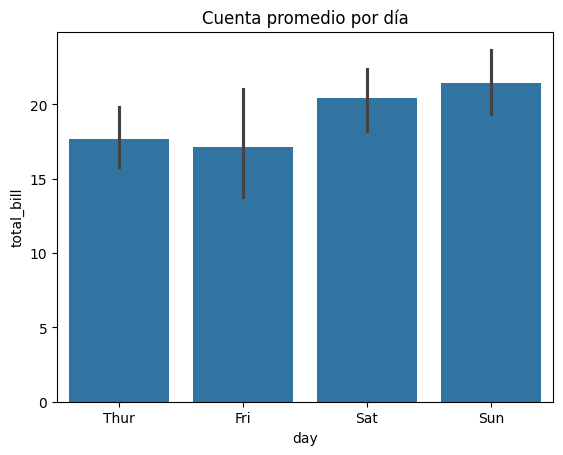

In [ ]:
# Gráfico de barras promedio por día
sns.barplot(data=df, x="day", y="total_bill")
plt.title("Cuenta promedio por día")
plt.show()

In [ ]:
#Barra de error: representa la variabilidad de los datos del promedio que se muestra en cada barra.
#(por defecto, Seaborn usa un intervalo de confianza del 95% para estas barras de error.)

##¿Cómo quitarla? Agregamos `errorbar=None`:

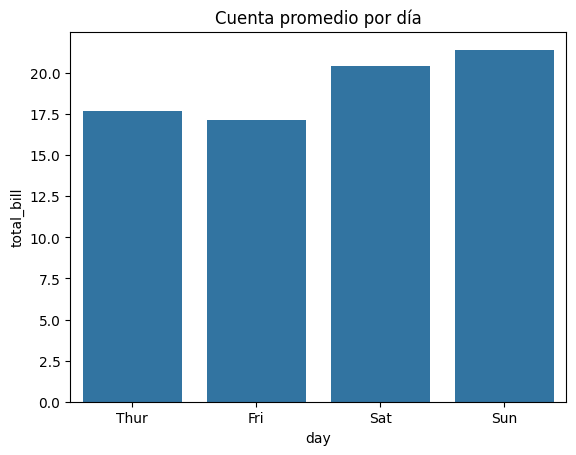

In [ ]:
#Barra de error: representa la variabilidad de los datos del promedio que se muestra en cada barra.
#(por defecto, Seaborn usa un intervalo de confianza del 95% para estas barras de error.)

##¿Cómo quitarla? Agregamos `errorbar=None`:

sns.barplot(data=df, x="day", y="total_bill", errorbar=None)
plt.title("Cuenta promedio por día")
plt.show()

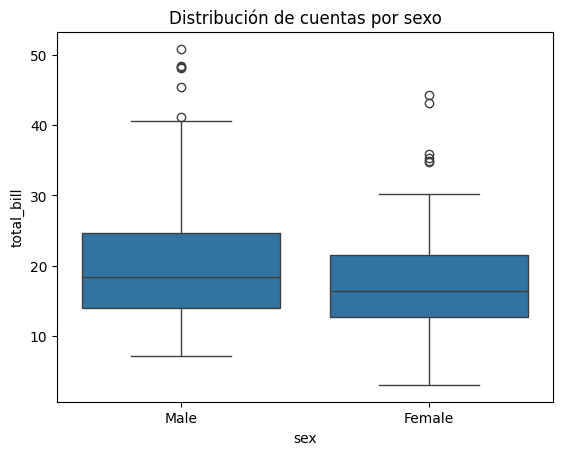

In [ ]:
# Boxplot por sexo
sns.boxplot(data=df, x="sex", y="total_bill")
plt.title("Distribución de cuentas por sexo")
plt.show()

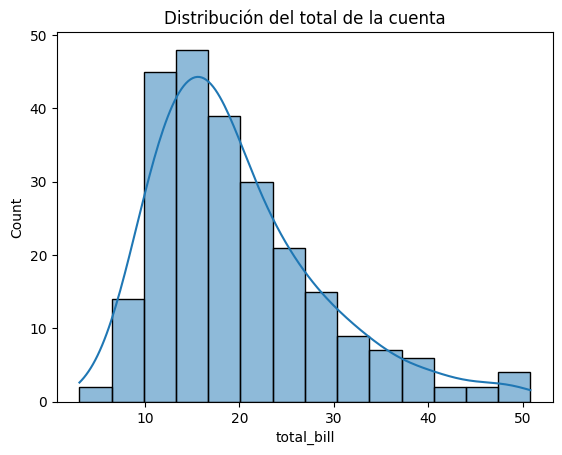

In [ ]:
# Histograma
sns.histplot(data=df, x="total_bill", kde=True)
plt.title("Distribución del total de la cuenta")
plt.show()

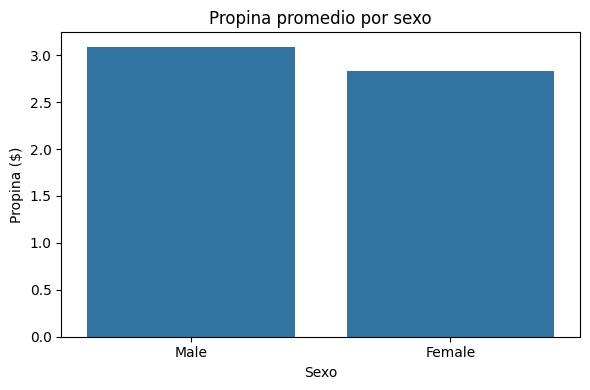

In [ ]:
# Gráfico de barras: propina promedio por sexo
plt.figure(figsize=(6,4))
sns.barplot(data=df, x="sex", y="tip", legend=False, errorbar=None)
#sns.barplot(data=df, x="sex", y="tip", hue="sex", legend=False, errorbar=None) #si quisiera ajustar la gama de colores agrego palette="pastel"
#hue="sex" → así seaborn sabe aplicar colores distintos por sexo
#legend=False → oculta la leyenda, porque ya está indicado en el eje X

plt.title("Propina promedio por sexo")
plt.xlabel("Sexo")
plt.ylabel("Propina ($)")
plt.tight_layout()
plt.show()

#### **Parte 2: Comparaciones y relaciones**

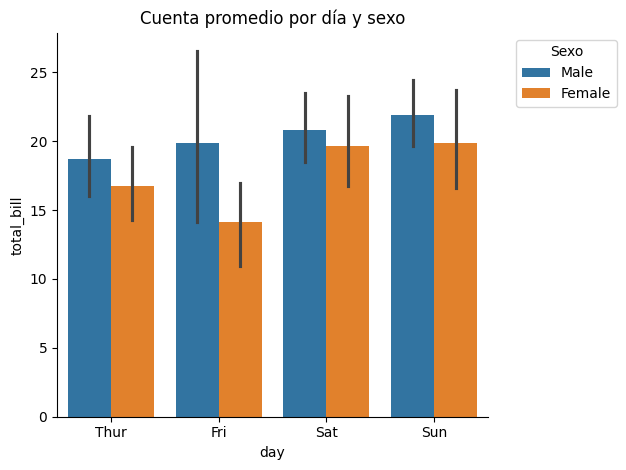

In [ ]:
# Gráfico de barras con subgrupos
sns.barplot(data=df, x="day", y="total_bill", hue="sex") #errorbar=None
plt.title("Cuenta promedio por día y sexo")
sns.despine(top=True, right=True)
plt.legend(title='Sexo', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

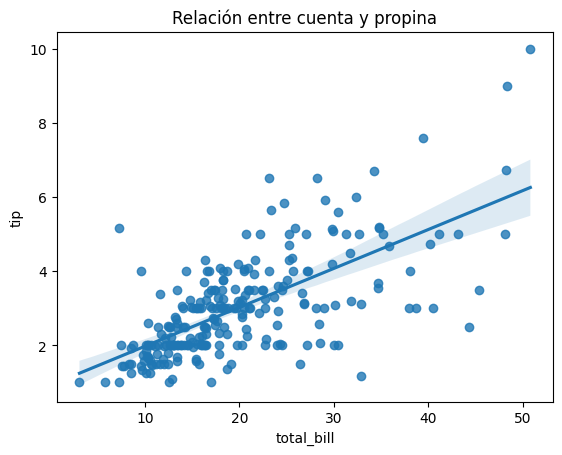

In [ ]:
# Dispersión con regresión
sns.regplot(data=df, x="total_bill", y="tip")
plt.title("Relación entre cuenta y propina")
plt.show()

In [ ]:
# Parte 3: Matriz de correlación
correlacion = df.corr(numeric_only=True).round(2)
print(correlacion)

            total_bill   tip  size
total_bill        1.00  0.68  0.60
tip               0.68  1.00  0.49
size              0.60  0.49  1.00


In [ ]:
# Parte 4: Mapa de calor

# Nueva columna: porcentaje de propina
df["tip_percent"] = df["tip"] / df["total_bill"] * 100
df.head()

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


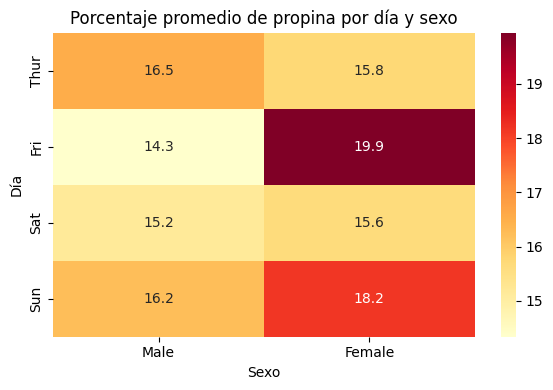

In [ ]:
# Crear tabla dinámica
tabla = df.pivot_table(
    values="tip_percent",
    index="day",
    columns="sex",
    aggfunc="mean",
    observed=True
)

plt.figure(figsize=(6, 4))
sns.heatmap(tabla, annot=True, cmap="YlOrRd", fmt=".1f")
plt.title("Porcentaje promedio de propina por día y sexo")
plt.xlabel("Sexo")
plt.ylabel("Día")
plt.tight_layout()
plt.show()